In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint
import json
from datetime import datetime 

# Pull source UI file
ui_clean = pd.read_csv("../Resources/ui_clean.csv")

st_abbrev = pd.read_csv("../Resources/state_abbrev.csv")

ui_clean['Year'] = pd.DatetimeIndex(ui_clean['Reflecting Week Ended']).year
ui_clean.head(2)

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate,Weeknum,Year
0,California,2015-01-03,"40,784",2014-12-27,"420,154","15,245,478",2.76,52,2014
1,California,2015-01-10,"66,906",2015-01-03,"423,923","15,354,250",2.76,1,2015


In [61]:
ui_2020_parse = ui_clean[ui_clean["Year"] == 2020]
ui_2020 = ui_2020_parse.groupby(['State', 'Weeknum'])["Insured Unemployment Rate"].mean()
ui_2020 = pd.DataFrame(ui_2020)
ui_2020.to_csv("../Resources/ui_2020.csv", index=True)
ui_2020.head(2)

Insured Unemployment Rate
State      Weeknum                           
California 1                             2.06
           2                             2.18

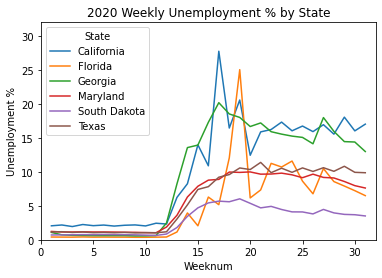

In [62]:
ui_2020.pivot_table('Insured Unemployment Rate', index='Weeknum', columns='State', aggfunc='mean').plot()
plt.axis([0, 32, 0, 32])
plt.ylabel('Unemployment %')
plt.title("2020 Weekly Unemployment % by State")
plt.savefig('../output_data/UI_CV_Scat/2020_wk_UI_allstates_linechart.png')

In [63]:
###############################

In [64]:
# Pull source ad file
cv_df = pd.read_csv("../Resources/clean_covid.csv")
cv_full_state_name = cv_df.rename(columns={'State': 'Code'})
# cv_full_state_name = cv_df.rename(columns={'weeknum': 'Weeknum'})
cv_full_state_name.head(1)

,Date,Code,Positive,Positive Increase,Death Increase,Death Confirmed,Death Probable,Hospitalized,Negative,Recovered,Total,Total Test Results,Date Format,weeknum
0,20200823,CA,663669.0,6777.0,146.0,12134.0,NaN,NaN,9877362.0,NaN,10541031.0,10541031.0,2020-08-23,34


In [65]:
cv_new_clean = pd.merge(cv_full_state_name, st_abbrev, on='Code', how='left')
cv_new_clean.head(1)

,Date,Code,Positive,Positive Increase,Death Increase,Death Confirmed,Death Probable,Hospitalized,Negative,Recovered,Total,Total Test Results,Date Format,weeknum,State,Abbrev
0,20200823,CA,663669.0,6777.0,146.0,12134.0,NaN,NaN,9877362.0,NaN,10541031.0,10541031.0,2020-08-23,34,California,Calif.


In [66]:
cv_new_clean = cv_new_clean.rename(columns={'weeknum': 'Weeknum'})
cv_new_clean.head(1)

,Date,Code,Positive,Positive Increase,Death Increase,Death Confirmed,Death Probable,Hospitalized,Negative,Recovered,Total,Total Test Results,Date Format,Weeknum,State,Abbrev
0,20200823,CA,663669.0,6777.0,146.0,12134.0,NaN,NaN,9877362.0,NaN,10541031.0,10541031.0,2020-08-23,34,California,Calif.


In [67]:
cv_cal = cv_new_clean[cv_new_clean["State"] == "California"]
cv_cal_group = cv_cal.groupby(['State', 'Weeknum'])["Positive Increase"].mean()
cv_cal_group = pd.DataFrame(cv_cal_group)
# cv_cal_group.to_csv("../Resources/cv_2020.csv", index=True)

In [68]:
cv_fl = cv_new_clean[cv_new_clean["State"] == "Florida"]
cv_fl_group = cv_fl.groupby(['State', 'Weeknum'])["Positive Increase"].mean()
cv_fl_group = pd.DataFrame(cv_fl_group)
# cv_cal_group.to_csv("../Resources/cv_2020.csv", index=True)

In [69]:
cv_ga = cv_new_clean[cv_new_clean["State"] == "Georgia"]
cv_ga_group = cv_ga.groupby(['State', 'Weeknum'])["Positive Increase"].mean()
cv_ga_group = pd.DataFrame(cv_ga_group)
# cv_cal_group.to_csv("../Resources/cv_2020.csv", index=True)

In [70]:
cv_md = cv_new_clean[cv_new_clean["State"] == "Maryland"]
cv_md_group = cv_md.groupby(['State', 'Weeknum'])["Positive Increase"].mean()
cv_md_group = pd.DataFrame(cv_md_group)
# cv_cal_group.to_csv("../Resources/cv_2020.csv", index=True)

In [71]:
cv_sd = cv_new_clean[cv_new_clean["State"] == "South Dakota"]
cv_sd_group = cv_sd.groupby(['State', 'Weeknum'])["Positive Increase"].mean()
cv_sd_group = pd.DataFrame(cv_sd_group)
# cv_cal_group.to_csv("../Resources/cv_2020.csv", index=True)

In [72]:
cv_tx = cv_new_clean[cv_new_clean["State"] == "Texas"]
cv_tx_group = cv_tx.groupby(['State', 'Weeknum'])["Positive Increase"].mean()
cv_tx_group = pd.DataFrame(cv_tx_group)
# cv_cal_group.to_csv("../Resources/cv_2020.csv", index=True)

In [73]:
cal_fla = cv_cal_group.append(cv_fl_group)
cal_fla_ga = cal_fla.append(cv_ga_group)
cal_fla_ga_md =cal_fla_ga.append(cv_md_group)
cal_fla_ga_md_sd = cal_fla_ga_md.append(cv_sd_group)
cv_all_df = cal_fla_ga_md_sd.append(cv_tx_group)
cv_all_df = pd.DataFrame(cv_all_df)
cv_all_df.to_csv("../Resources/cv_all_df.csv", index=True)
cv_all_df.head()

Positive Increase
State      Weeknum                   
California 10                7.000000
           11               29.285714
           12              177.571429
           13              596.000000
           14             1104.285714

In [74]:
cv_all_df = cv_all_df.rename(columns={"Positive Increase": "COVID-19"})
ui_cv_forscatter = pd.merge(cv_all_df, ui_2020, how= "outer", on = ["State", "Weeknum"])
ui_cv_forscatter = ui_cv_forscatter.reset_index()
ui_cv_forscatter

,State,Weeknum,COVID-19,Insured Unemployment Rate
0,California,10,7.000000,2.04
1,California,11,29.285714,2.44
2,California,12,177.571429,2.32
3,California,13,596.000000,6.24
4,California,14,1104.285714,8.25
...,...,...,...,...
199,Texas,5,NaN,1.05
200,Texas,6,NaN,1.09
201,Texas,7,NaN,1.04
202,Texas,8,NaN,1.09


In [75]:
ui_cv_scat_clean = ui_cv_forscatter.dropna(how='any')
ui_cv_scat_clean.to_csv("../Resources/ui_cv_scat_clean.csv", index=True)
ui_cv_scat_clean

,State,Weeknum,COVID-19,Insured Unemployment Rate
0,California,10,7.000000,2.04
1,California,11,29.285714,2.44
2,California,12,177.571429,2.32
3,California,13,596.000000,6.24
4,California,14,1104.285714,8.25
...,...,...,...,...
142,Texas,27,6644.428571,10.61
143,Texas,28,9059.857143,10.08
144,Texas,29,9481.714286,10.82
145,Texas,30,8089.428571,9.93


R Val is 0.11049865197151916


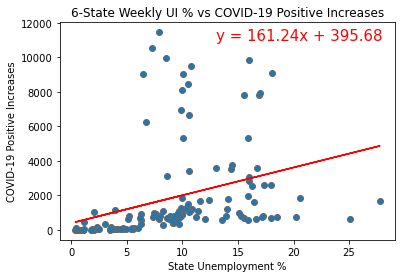

In [77]:
#plotting and formatting scatter
plt.scatter(ui_cv_scat_clean['Insured Unemployment Rate'], ui_cv_scat_clean['COVID-19'],marker="o", facecolors="tab:blue", edgecolors="dimgray")

#inserting chart labels
plt.xlabel("State Unemployment %")
plt.ylabel("COVID-19 Positive Increases")
plt.title("6-State Weekly UI % vs COVID-19 Positive Increases")

#defining values
x_values = ui_cv_scat_clean['Insured Unemployment Rate']
y_values = ui_cv_scat_clean['COVID-19']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(13,11000),fontsize=15,color="red") 

plt.savefig('../output_data/UI_CV_Scat/Allstates_UI_vs_CV_scat.png')

THIS SCATTER INCLUDES WEEKS 10-34.  SCHOOLS BEGAN SHUTTING IN AROUND WEEK 13

In [78]:
ui_scat_cal = ui_cv_scat_clean[ui_cv_scat_clean["State"] == "California"]
ui_scat_cal.head(2)

,State,Weeknum,COVID-19,Insured Unemployment Rate
0,California,10,7.000000,2.04
1,California,11,29.285714,2.44


R Val is 0.2061400286961551


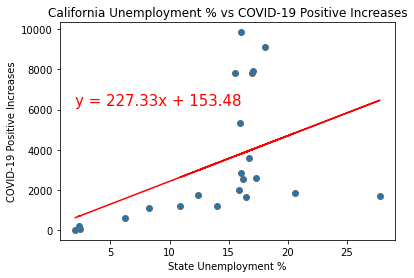

In [79]:
#plotting and formatting scatter
plt.scatter(ui_scat_cal['Insured Unemployment Rate'], ui_scat_cal['COVID-19'],marker="o", facecolors="tab:blue", edgecolors="dimgray")

#inserting chart labels
plt.xlabel("State Unemployment %")
plt.ylabel("COVID-19 Positive Increases")
plt.title("California Unemployment % vs COVID-19 Positive Increases")

#defining values
x_values = ui_scat_cal['Insured Unemployment Rate']
y_values = ui_scat_cal['COVID-19']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(2, 6200),fontsize=15,color="red") 
plt.savefig('../output_data/UI_CV_Scat/CAL_UI_vs_CV_scat.png')

In [80]:
ui_scat_fl = ui_cv_scat_clean[ui_cv_scat_clean["State"] == "Florida"]
ui_scat_fl.head(2)

,State,Weeknum,COVID-19,Insured Unemployment Rate
25,Florida,10,3.000000,0.37
26,Florida,11,14.142857,0.39


R Val is 0.013558957894785322


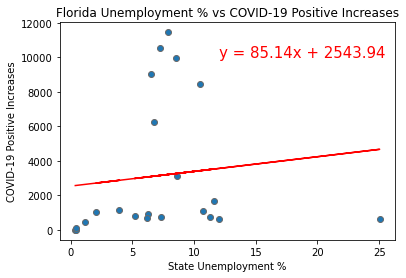

In [81]:
# plotting and formatting scatter
plt.scatter(ui_scat_fl['Insured Unemployment Rate'], ui_scat_fl['COVID-19'],marker="o", facecolors="tab:blue", edgecolors="dimgray")

#inserting chart labels
plt.xlabel("State Unemployment %")
plt.ylabel("COVID-19 Positive Increases")
plt.title("Florida Unemployment % vs COVID-19 Positive Increases")

#defining values
x_values = ui_scat_fl['Insured Unemployment Rate']
y_values = ui_scat_fl['COVID-19']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(12, 10000),fontsize=15,color="red") 
plt.savefig('../output_data/UI_CV_Scat/FL_UI_vs_CV_scat.png')

In [82]:
ui_scat_ga = ui_cv_scat_clean[ui_cv_scat_clean["State"] == "Georgia"]
ui_scat_ga.head(2)

,State,Weeknum,COVID-19,Insured Unemployment Rate
50,Georgia,10,1.000000,0.58
51,Georgia,11,13.142857,0.63


R Val is 0.10417330917941174


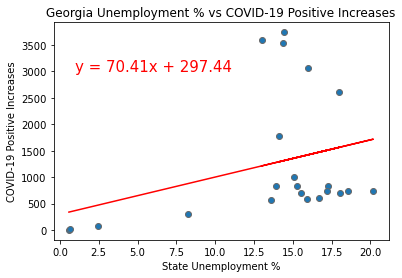

In [83]:
# plotting and formatting scatter
plt.scatter(ui_scat_ga['Insured Unemployment Rate'], ui_scat_ga['COVID-19'],marker="o", facecolors="tab:blue", edgecolors="dimgray")

#inserting chart labels
plt.xlabel("State Unemployment %")
plt.ylabel("COVID-19 Positive Increases")
plt.title("Georgia Unemployment % vs COVID-19 Positive Increases")

#defining values
x_values = ui_scat_ga['Insured Unemployment Rate']
y_values = ui_scat_ga['COVID-19']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(1, 3000),fontsize=15,color="red") 
plt.savefig('../output_data/UI_CV_Scat/GA_UI_vs_CV_scat.png')

In [84]:
ui_scat_md = ui_cv_scat_clean[ui_cv_scat_clean["State"] == "Maryland"]
ui_scat_md.head(2)

,State,Weeknum,COVID-19,Insured Unemployment Rate
75,Maryland,10,0.75,1.06
76,Maryland,11,4.00,1.04


R Val is 0.62987345459035


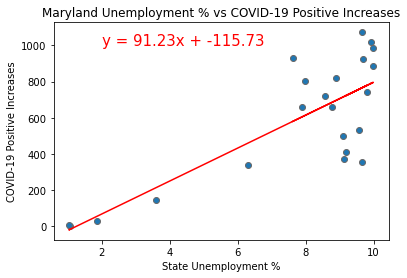

In [85]:
#plotting and formatting scatter
plt.scatter(ui_scat_md['Insured Unemployment Rate'], ui_scat_md['COVID-19'],marker="o", facecolors="tab:blue", edgecolors="dimgray")

#inserting chart labels
plt.xlabel("State Unemployment %")
plt.ylabel("COVID-19 Positive Increases")
plt.title("Maryland Unemployment % vs COVID-19 Positive Increases")

#defining values
x_values = ui_scat_md['Insured Unemployment Rate']
y_values = ui_scat_md['COVID-19']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(2, 1000),fontsize=15,color="red") 
plt.savefig('../output_data/UI_CV_Scat/MD_UI_vs_CV_scat.png')

In [86]:
ui_scat_sd = ui_cv_scat_clean[ui_cv_scat_clean["State"] == "South Dakota"]
ui_scat_sd.head(2)

,State,Weeknum,COVID-19,Insured Unemployment Rate
100,South Dakota,10,0.000000,0.69
101,South Dakota,11,1.285714,0.64


R Val is 0.7404008022828966


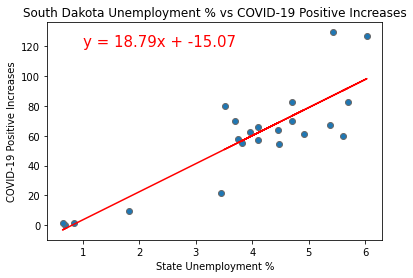

In [87]:
# plotting and formatting scatter
plt.scatter(ui_scat_sd['Insured Unemployment Rate'], ui_scat_sd['COVID-19'],marker="o", facecolors="tab:blue", edgecolors="dimgray")

#inserting chart labels
plt.xlabel("State Unemployment %")
plt.ylabel("COVID-19 Positive Increases")
plt.title("South Dakota Unemployment % vs COVID-19 Positive Increases")

#defining values
x_values = ui_scat_sd['Insured Unemployment Rate']
y_values = ui_scat_sd['COVID-19']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(1, 120),fontsize=15,color="red") 
plt.savefig('../output_data/UI_CV_Scat/SD_UI_vs_CV_scat.png')

In [88]:
ui_scat_tx = ui_cv_scat_clean[ui_cv_scat_clean["State"] == "Texas"]
ui_scat_tx.head(2)

,State,Weeknum,COVID-19,Insured Unemployment Rate
125,Texas,10,1.400000,1.05
126,Texas,11,6.857143,1.03


R Val is 0.2539567916715078


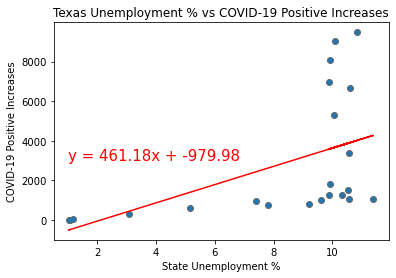

In [89]:
# plotting and formatting scatter
plt.scatter(ui_scat_tx['Insured Unemployment Rate'], ui_scat_tx['COVID-19'],marker="o", facecolors="tab:blue", edgecolors="dimgray")

#inserting chart labels
plt.xlabel("State Unemployment %")
plt.ylabel("COVID-19 Positive Increases")
plt.title("Texas Unemployment % vs COVID-19 Positive Increases")

#defining values
x_values = ui_scat_tx['Insured Unemployment Rate']
y_values = ui_scat_tx['COVID-19']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(1, 3000),fontsize=15,color="red") 
plt.savefig('../output_data/UI_CV_Scat/TX_UI_vs_CV_scat.png')